In [2]:
R.home()

[1] "/home/chensijie/software/anaconda3/envs/r40py38/lib/R"

In [1]:
suppressPackageStartupMessages({
    library(Seurat)
    library(dplyr)
    library(SeuratDisk)
    library(ggpubr)
    library(tictoc)
    library(future)
    library(ComplexHeatmap)
    library(circlize)
    library("Nebulosa")
})

o <- function(w,h){
    options(repr.plot.width=w, repr.plot.height=h)
}

In [3]:
load("t.cd8.rda")
ls()

[1] "o"     "t.cd8"

In [4]:
seu <- t.cd8
seu <- FindVariableFeatures(seu, selection.method = "vst", nfeatures=1000,verbose=F)
seu <- ScaleData(seu, features = rownames(seu), verbose=F, block.size=1000, min.cells.to.block=200)
seu <- RunPCA(seu, features = VariableFeatures(object = seu), npcs = 50,verbose=F)
seu <- RunUMAP(seu, dims = 1:50, verbose = F, n.neighbors = 20L, min.dist = 0.2)
seu -> t.cd8

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


In [22]:
t.cd8 <- FindNeighbors(t.cd8, dims = 1:20)
t.cd8 <- FindClusters(t.cd8, resolution = 0.7)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3198
Number of edges: 131035

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8000
Number of communities: 8
Elapsed time: 0 seconds


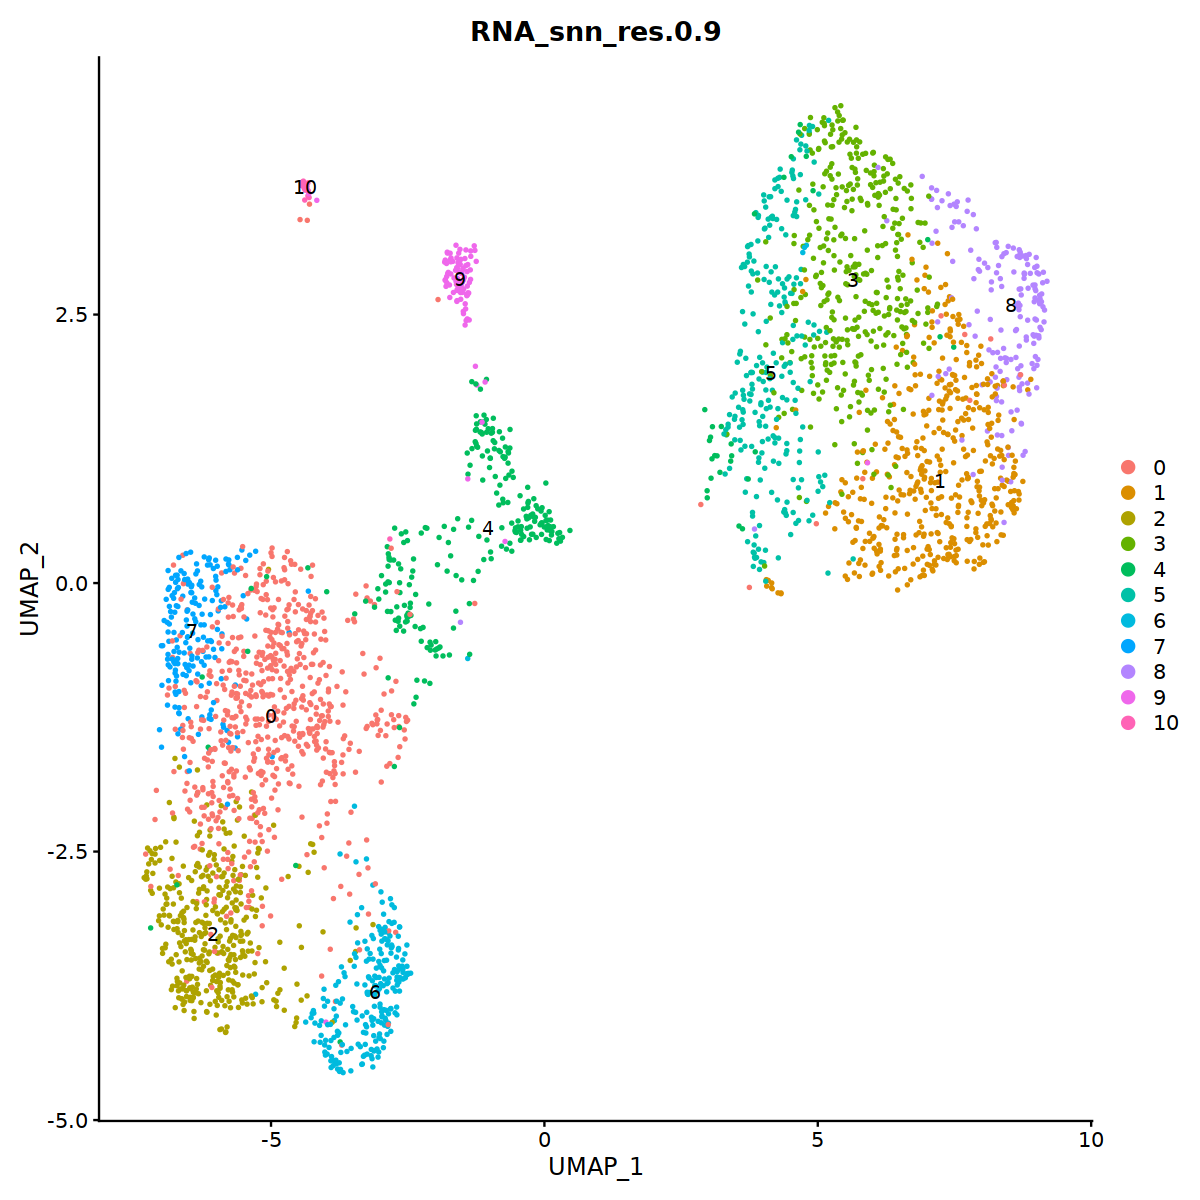

In [41]:
o(10,10)
DimPlot(t.cd8, group.by='RNA_snn_res.0.9',label=T)

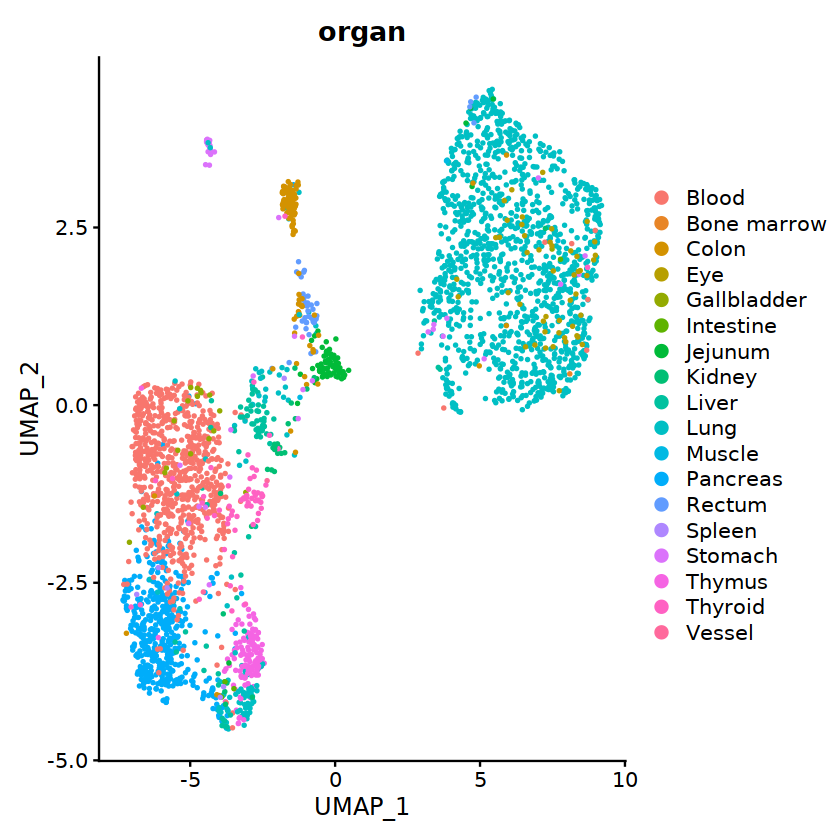

In [10]:
DimPlot(t.cd8, group.by='organ')

In [14]:
# 1.1 Collect expression matrix
mat  = GetAssayData(t.cd8, slot = "data", assay = "RNA")

# 1.2 Arrange the cells in a desired order
ordered.cells <- rownames(t.cd8@meta.data)

# 1.3 Select a list of genes of interest for drawing
features.sel <-  unique(c("PTPRC","PECAM1","COL1A1","EPCAM", "ITGAX","ITGAM",
                          "TRAC","TRBC1",'TRBC2', "TRDC","TRGC1","TRGC2",
                          "CD79A","MS4A1","CD3D","CD3E","CD4","CD8A","CD8B","TBX21","TRAC","TRBC1",'TRBC2',
                          "TRDC","TRGC1","TRGC2",
                          "NCAM1","FCGR3A",
                          "GATA3","RORC","FOXP3","CTLA4","TCF7","LEF1",
           "IL2RA",'CD44','CD69',"SELL",'IL7R',"CD27","CD28","CCR7","KIT",
           "ITGAE","NKG7","IFNG","PRF1",'GZMA','GZMB',"GZMK","IL17A","IL23R",
            "CD40LG","TOX2","ICOS","PDCD1",
            "ISG15","IFIT1","IFIT2","IFIT3", "CXCR6","CCR6",
            'TNF', 'IL4'))

# 1.4 Reorganize the original matrix by row and column
mat = as.matrix( mat[features.sel, ordered.cells] )


sub_grp
  1   2   3   4   5   6   7   8 
954 213 551 144 208 218 344 566 


Attaching package: ‘pheatmap’


The following object is masked from ‘package:ComplexHeatmap’:

    pheatmap




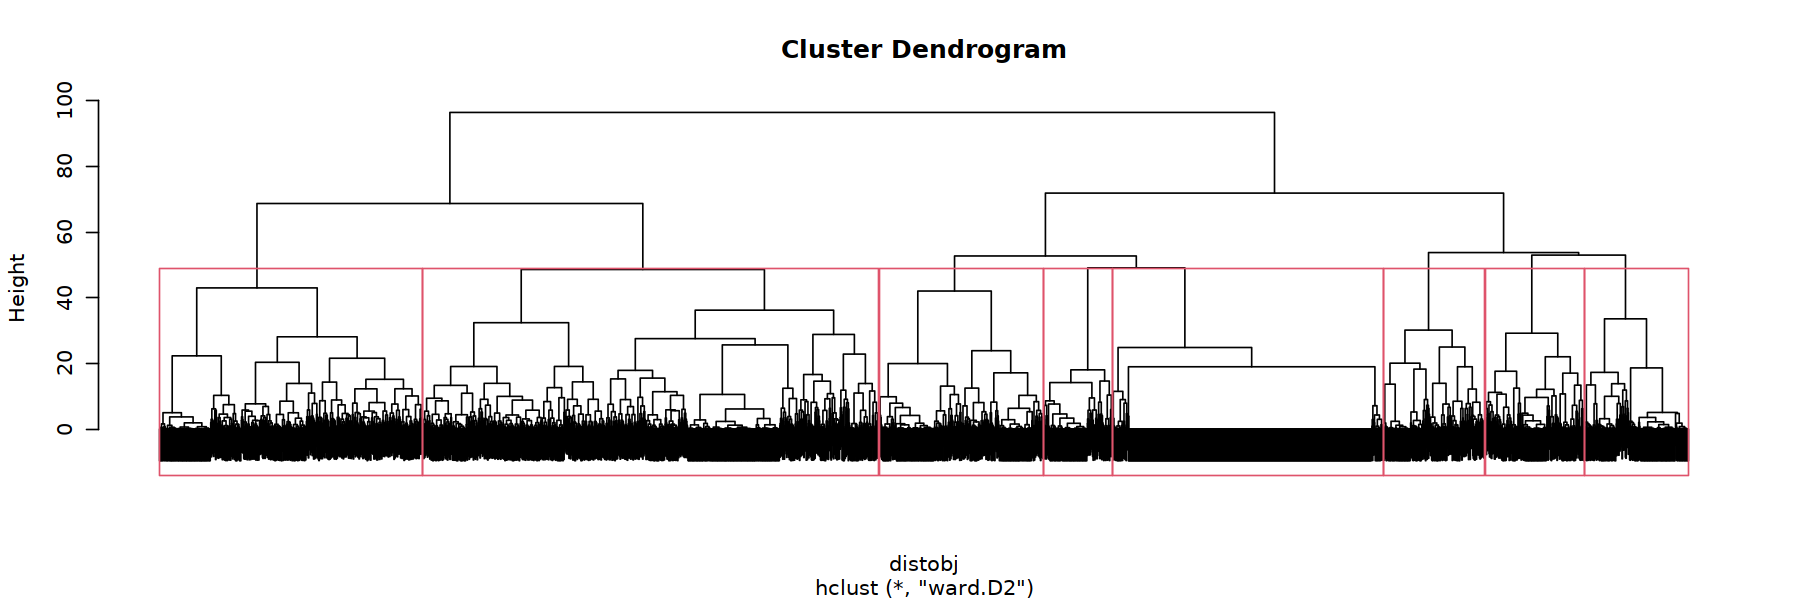

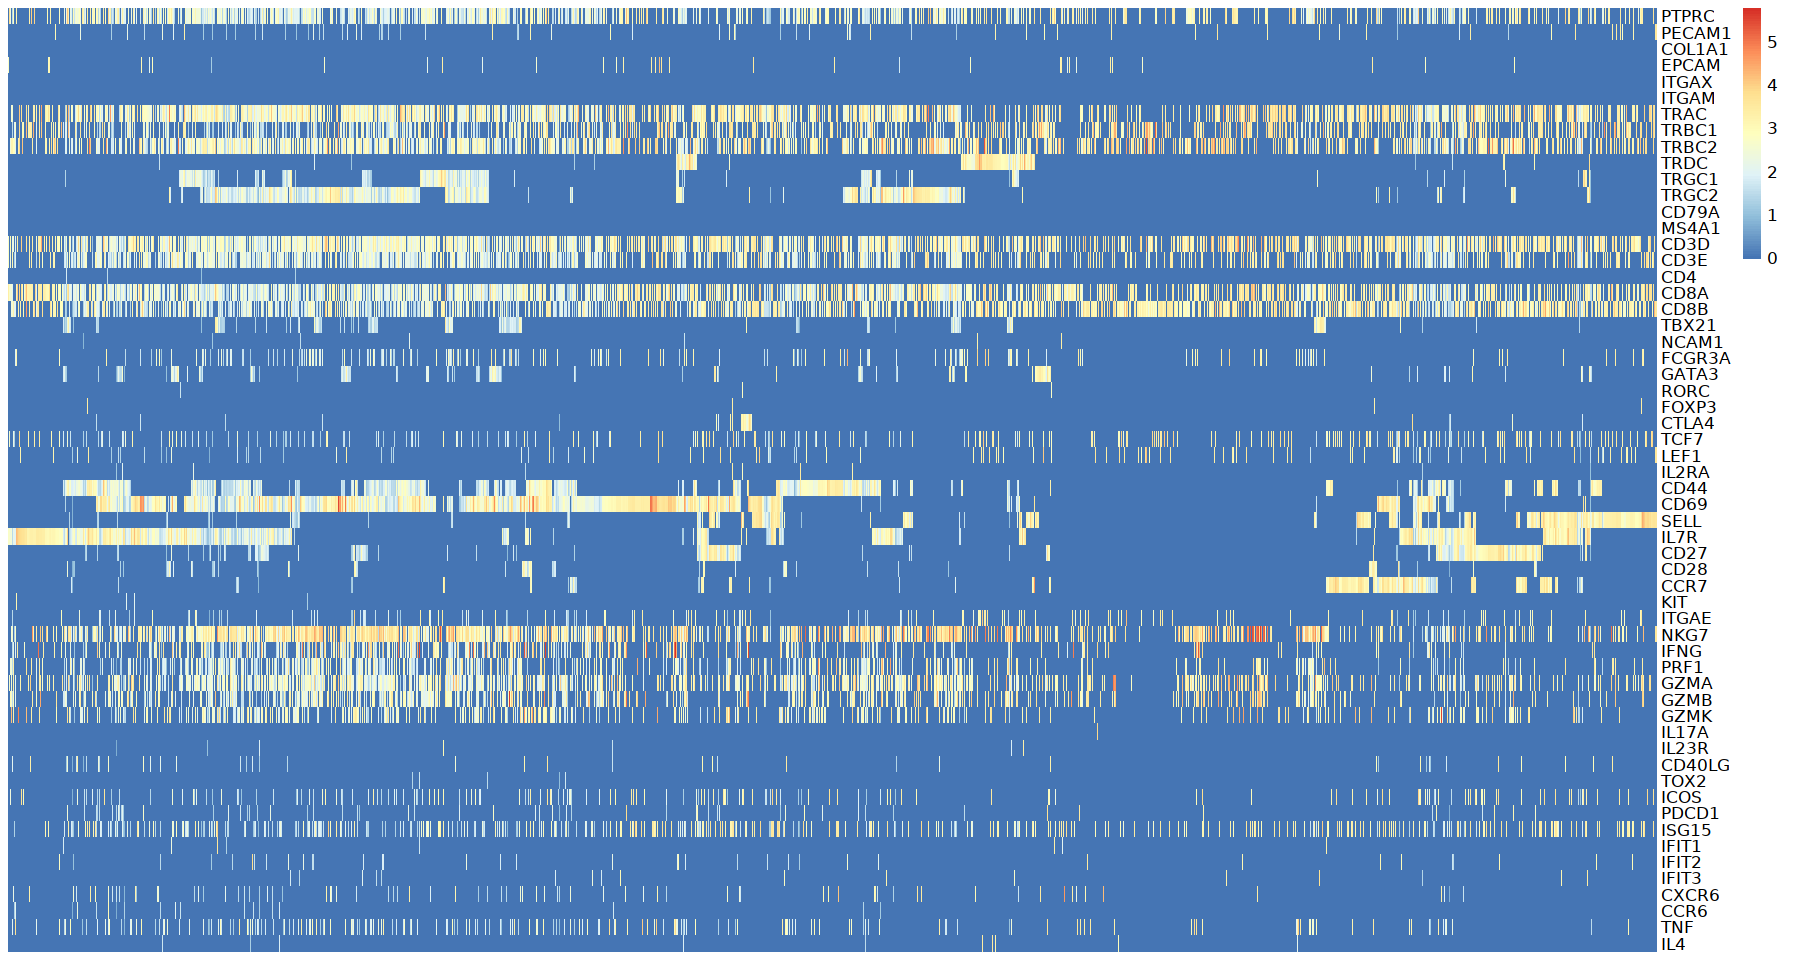

In [15]:
# 2.1 Hierarchical clustering

## Note that mat is a feature-by-sample matrix from Seurat and should be transposed into a sample-by-feature matrix;
## Here, select some genes for clustering, and then draw with other genes
distobj   <- dist(t(mat[c("IL2RA",'CD44','CD69',"SELL",'IL7R',"CD27","CD28","CCR7","TRDC","TRGC1","TRGC2",
                         "GATA3","RORC","FOXP3","CTLA4","TBX21") , ]), method = "euclidean")
hclustobj <- hclust(distobj, method = "ward.D2" )

# 2.2 Partition trees to form clusters
sub_grp <- cutree(hclustobj, k = 8) #Parameter K directly specifies the number of clusters, or parameter h can be used to specify the cutting depth
# Print the number of cells in each cluster
table(sub_grp) 
# Print the clustering tree
options(repr.plot.width=15, repr.plot.height=5)
plot(hclustobj, cex = 0.1, label=F) #draw the clustering tree，label=F to hide the sample names
rect.hclust(hclustobj, k = 8) #draw blocks
# Draw a Heatmap in the order of the cluster tree
library(pheatmap)
options(repr.plot.width=15, repr.plot.height=8)
pheatmap(mat[,hclustobj$order], cluster_rows =F, cluster_cols = F, 
         border_color=NA,
         show_colnames = F, use_raster=TRUE)

# If it's OK, put the result label of hierarchical clustering into the metadata
#t.cd4@meta.data["CD8sub"]<-as.character(sub_grp)


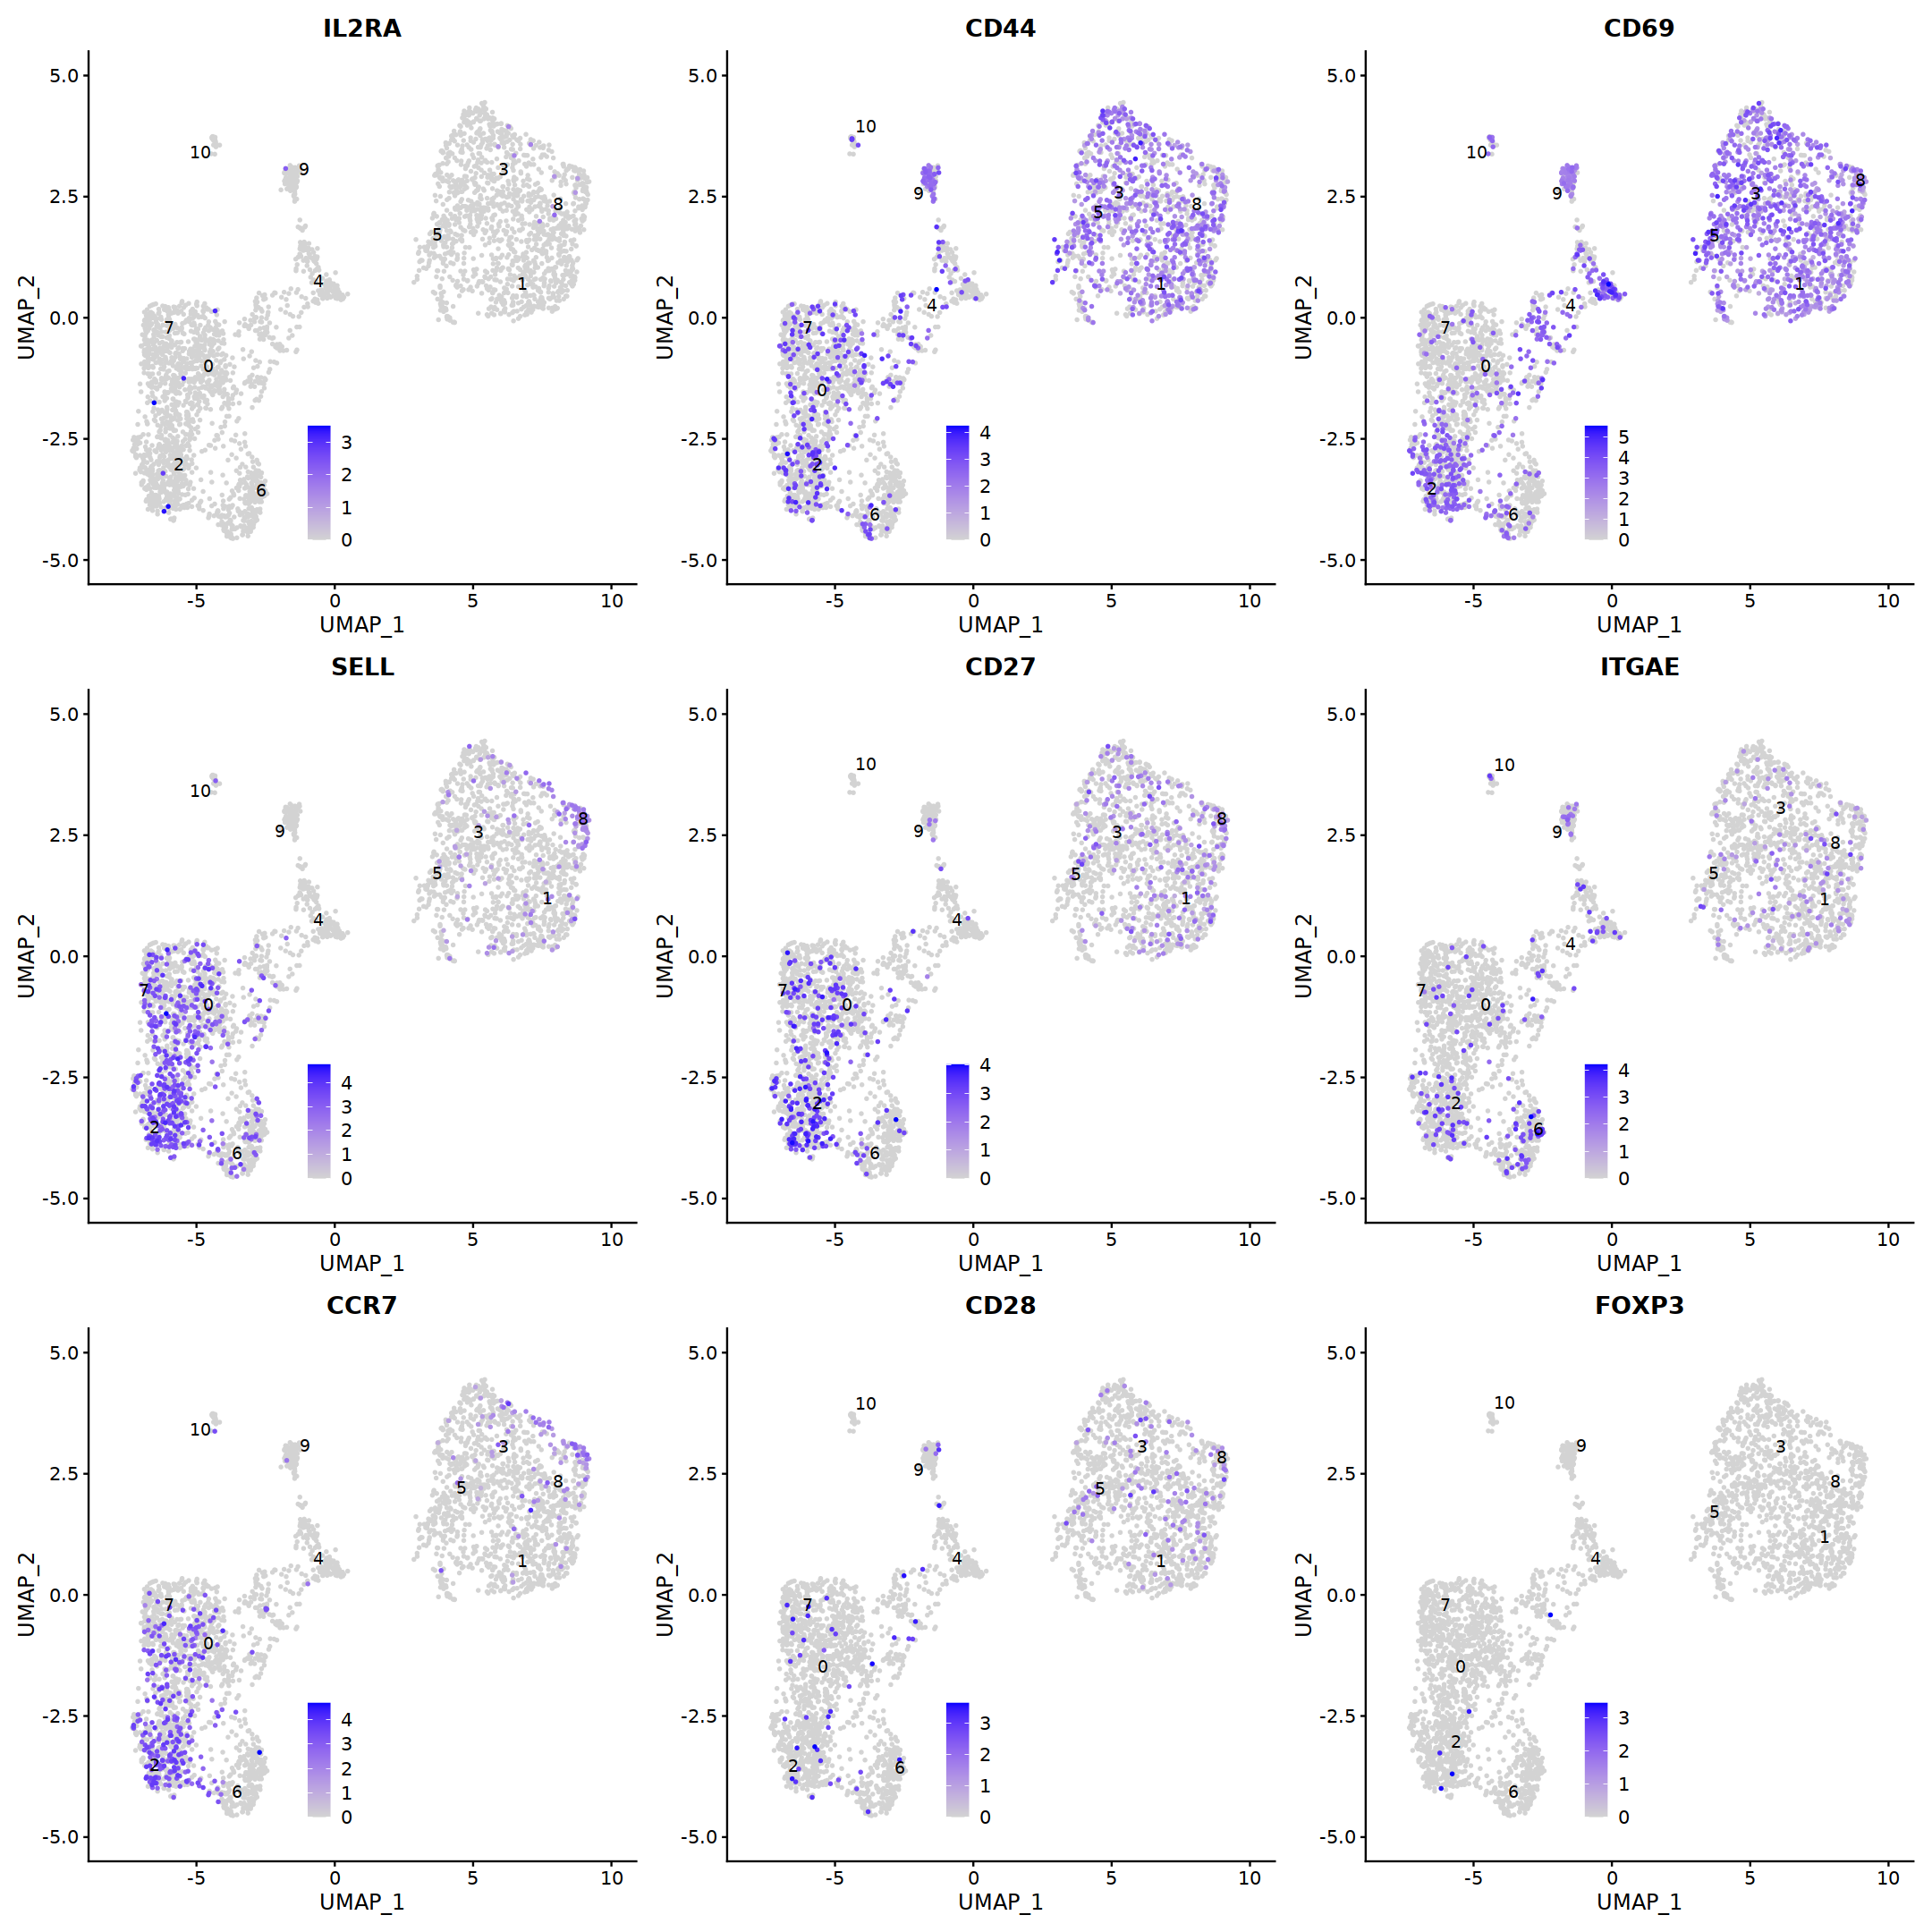

In [34]:
o(6*3, 6*3)
Idents(t.cd8)<-"RNA_snn_res.0.9"
FeaturePlot(t.cd8,order=T,n=3,  label=T, repel=T,
            features = c("IL2RA","CD44","CD69","SELL","CD27","ITGAE","CCR7","CD28","FOXP3")
           )&theme(legend.position = c(0.4,0.2))

Warning message in FeaturePlot(t.cd8, order = T, n = 4, label = T, features = c("CD4", :
“All cells have the same value (0) of IL5.”
Warning message in FeaturePlot(t.cd8, order = T, n = 4, label = T, features = c("CD4", :
“All cells have the same value (0) of IL9.”


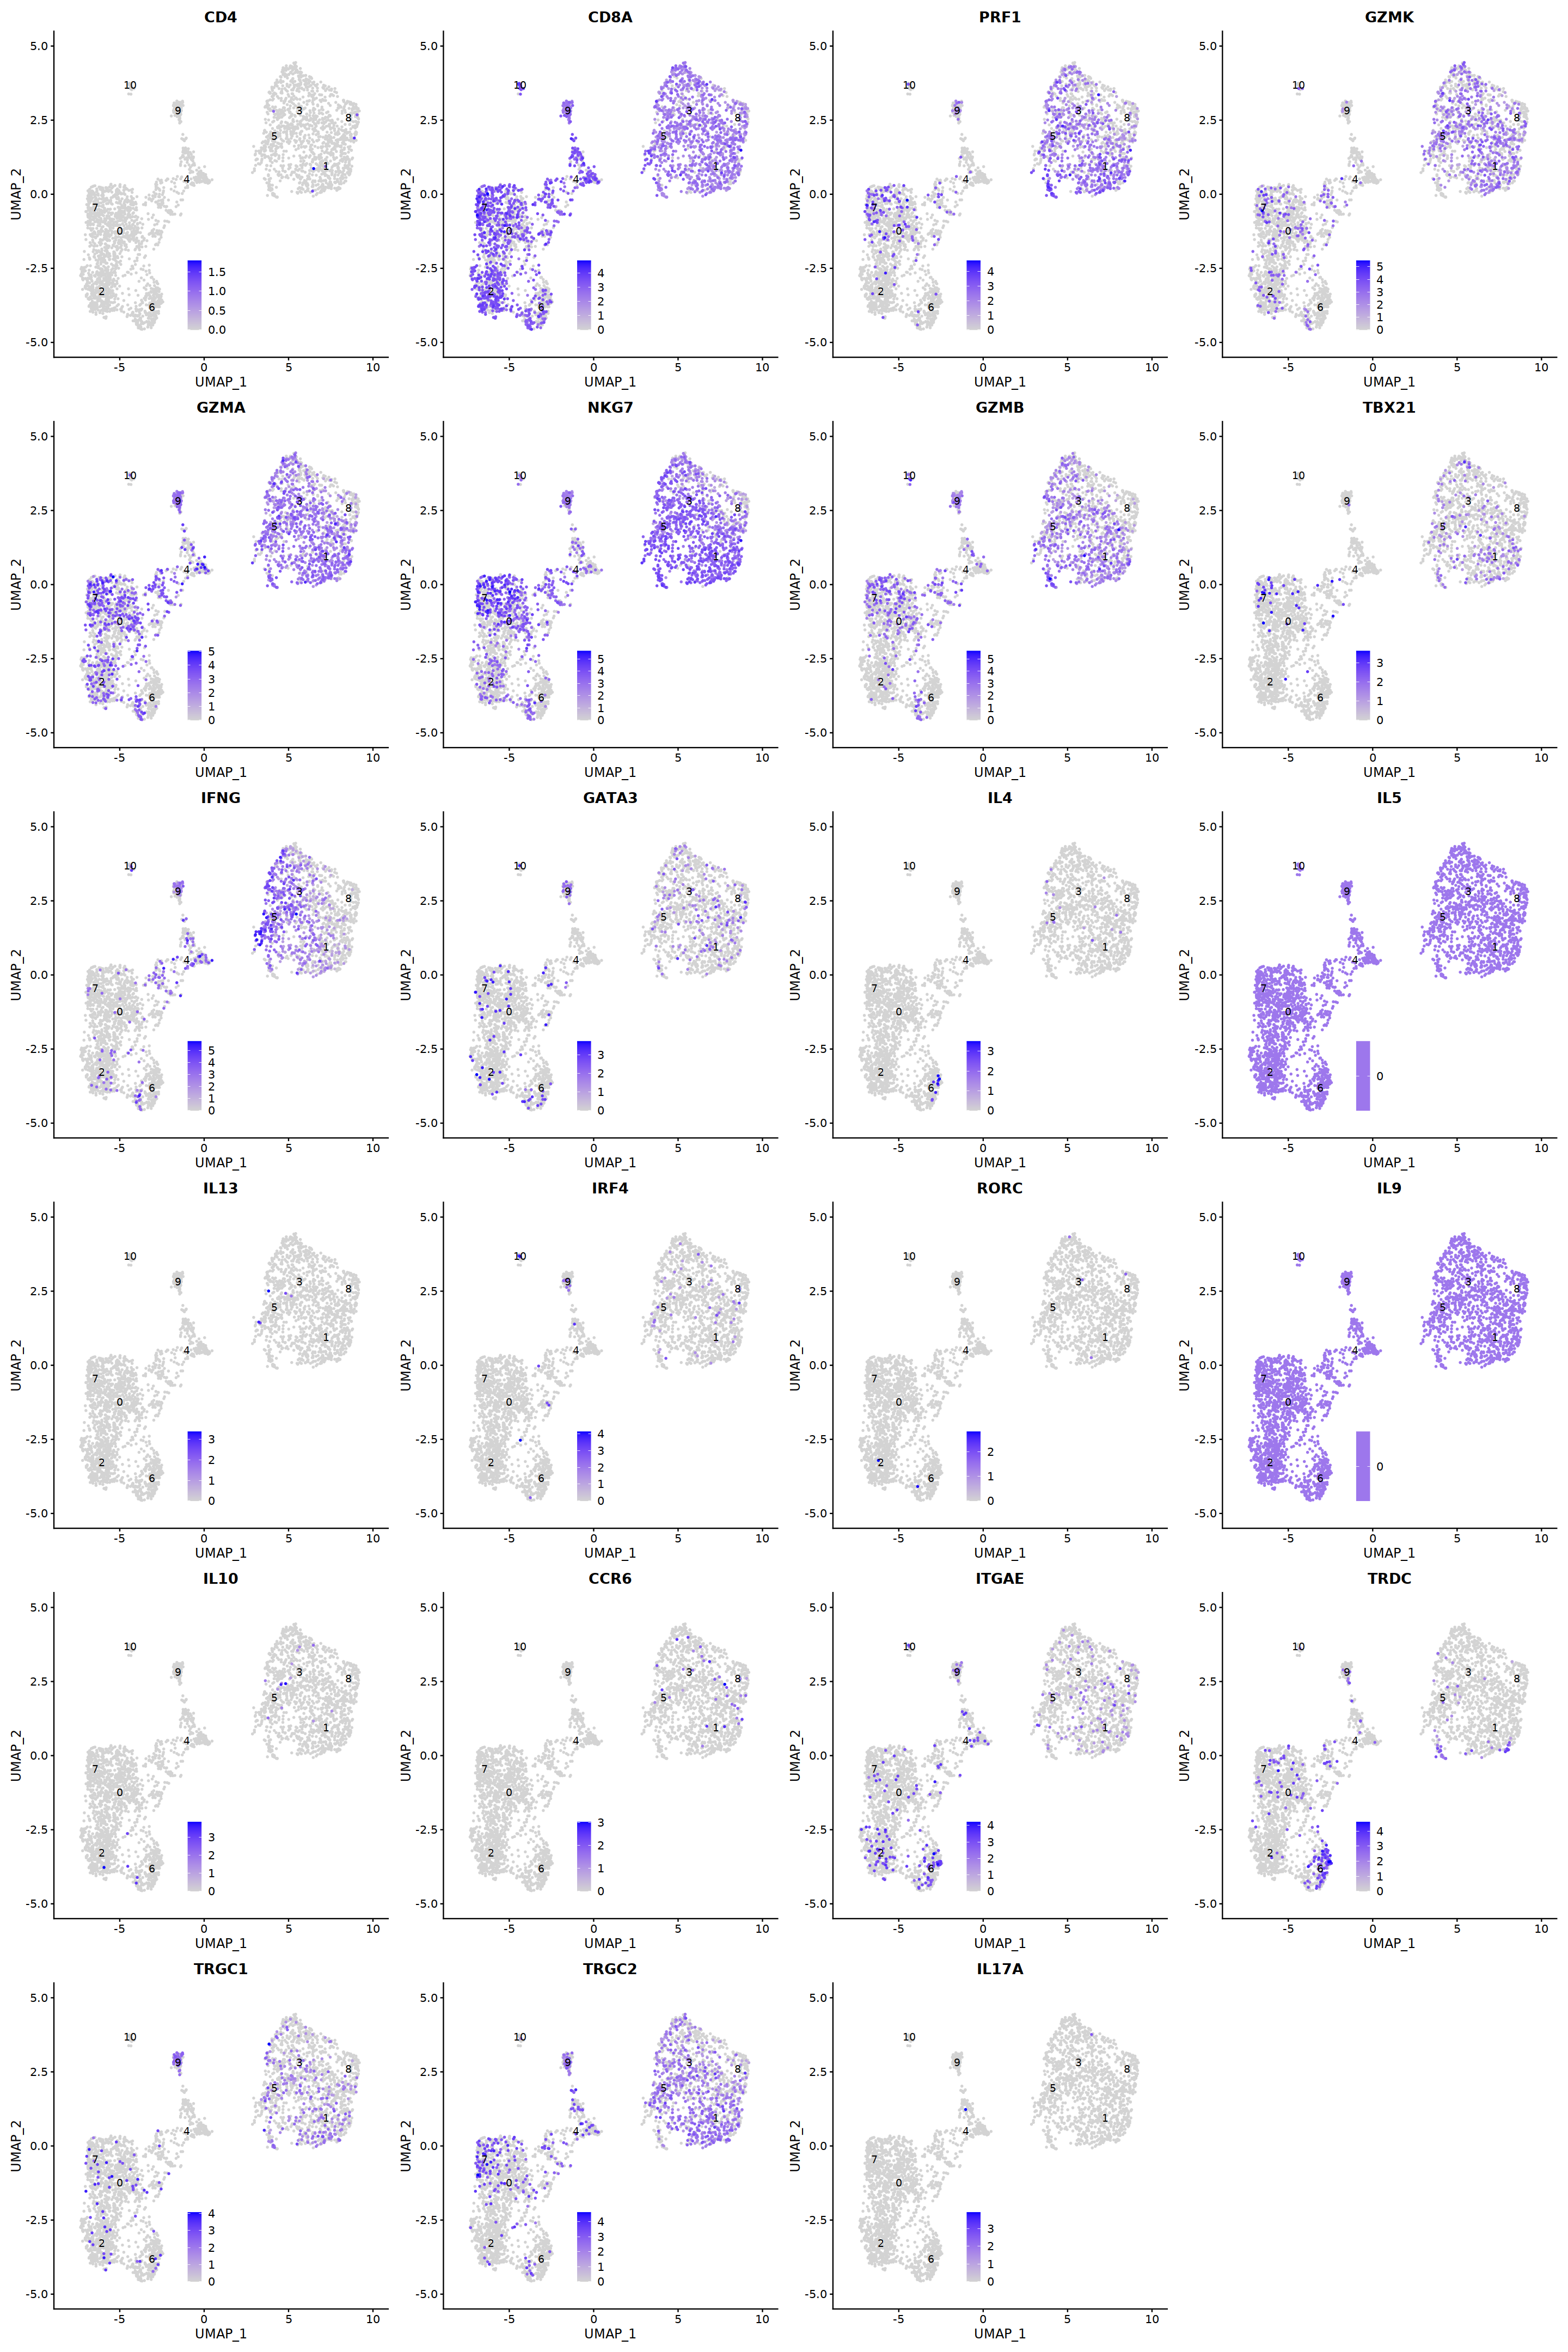

In [43]:
o(6*4, 6*6)
Idents(t.cd8)<-"RNA_snn_res.0.9"
FeaturePlot(t.cd8,order=T,n=4, label=T,
            features = c("CD4","CD8A","PRF1","GZMK","GZMA","NKG7","GZMB",
                         "TBX21","IFNG","GATA3","IL4","IL5","IL13",
                         "IRF4","RORC","IL9","IL10","CCR6","ITGAE",
                         "TRDC","TRGC1","TRGC2","IL17A"),
           )&theme(legend.position = c(0.4,0.2))

In [46]:
t.cd8<-RenameIdents(t.cd8,
            "8"="Tcm","2"="Tcm","6"="Trm", 
            "7"="Tc","9"="Tc","0"="Tc","4"="Trm",
            "1"="Trm" ,"3"="Trm", "5"="Trm", "10"="Trm")

Idents(t.cd8)->t.cd8[["CD8sub"]]

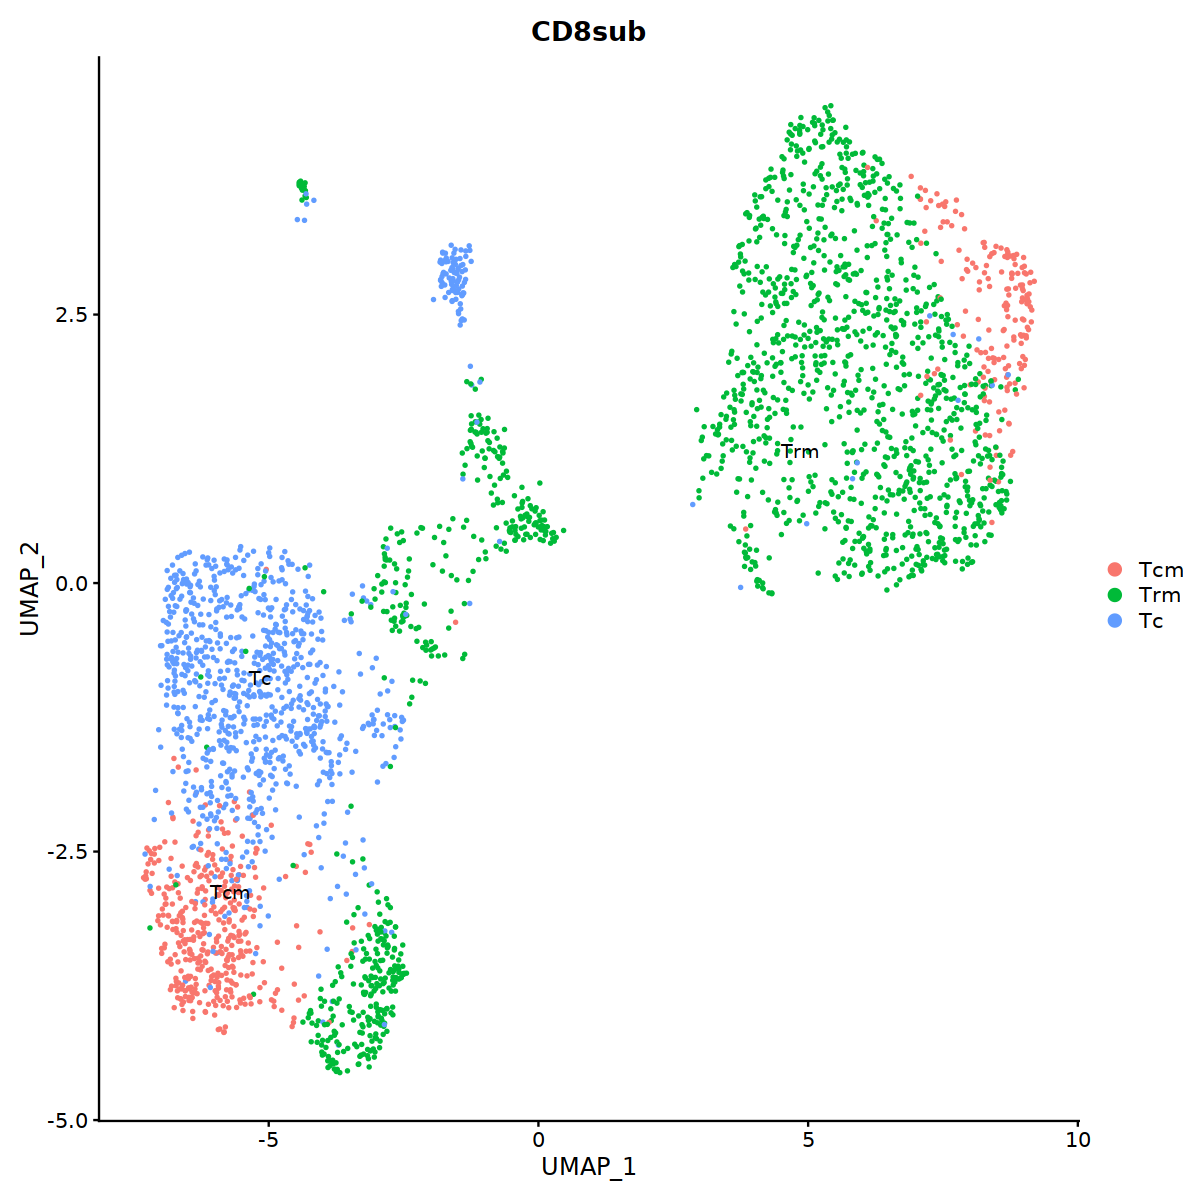

In [49]:
o(10,10)
DimPlot(t.cd8,label=T, group.by='CD8sub')

In [50]:
save(t.cd8, file = "t.cd8.annot.rda")